In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from collections import Counter as ctr
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

In [26]:
programmers = pd.read_csv('../data/programmers.csv')
programmers

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
...,...,...
87564,88182,HTML/CSS;Java;JavaScript
87565,88212,HTML/CSS;JavaScript;Python
87566,88282,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567,88377,HTML/CSS;JavaScript;Other(s):


## Horizontal bar

In [27]:
languages = programmers['LanguagesWorkedWith'].str.split(';').explode()
language_counts = languages.value_counts()
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ['Language','Vote']
plot_df = language_counts_df.sort_values(by='Vote', ascending=False)
plot_df.head()

,Language,Vote
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917


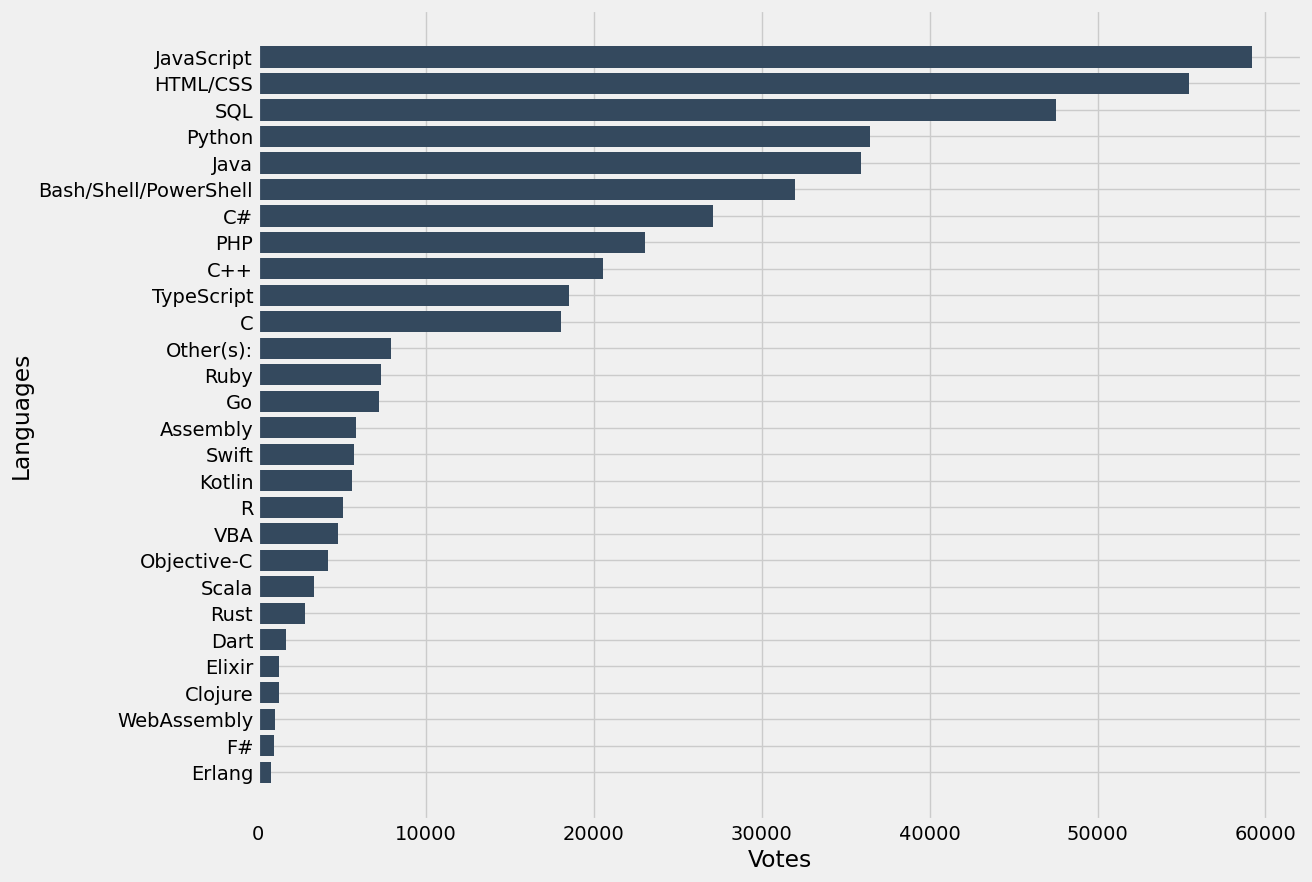

In [28]:
fig , ax = plt.subplots(
    figsize = (12,10)
)

ax.invert_yaxis()

ax.barh(
    plot_df['Language'],plot_df['Vote'],
    color = '#34495e'
);

ax.set(
    ylabel = 'Languages',
    xlabel = 'Votes',
);


## Pie chart 

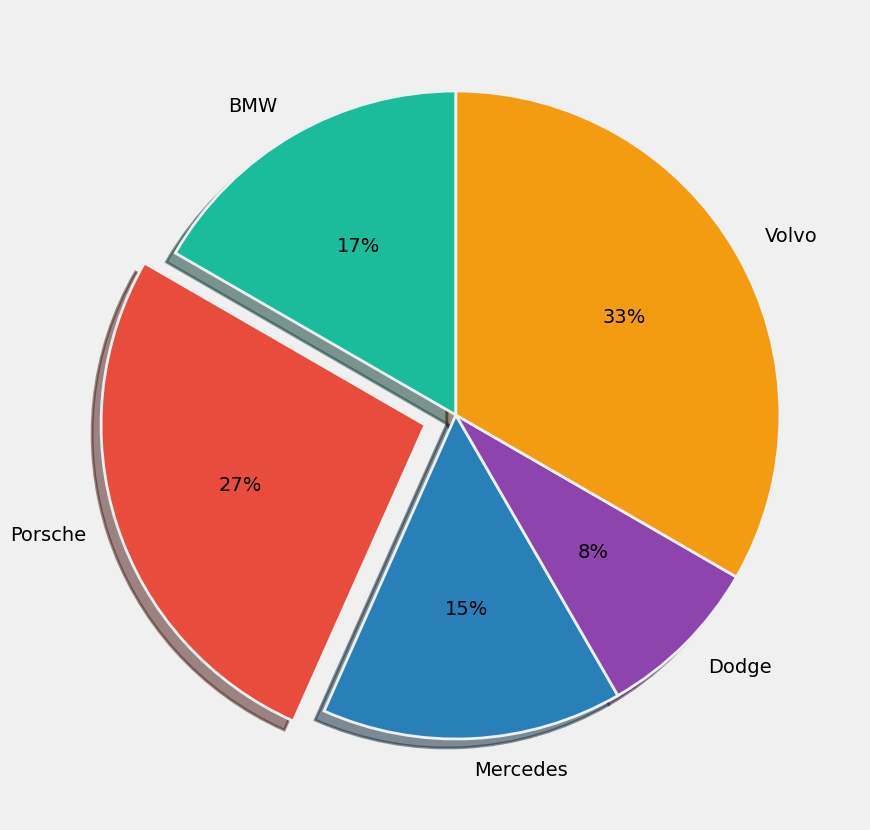

In [29]:
labels = ['BMW','Porsche','Mercedes','Dodge','Volvo']
explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Prosche')
colors = ['#1abc9c','#e74c3c','#2980b9','#8e44ad','#f39c12']
numbers = [10,16,9,5,20]
fig , ax = plt.subplots(
    figsize = (10,10)
)
ax.pie(
    numbers,
    labels=labels,
    explode=explode,
    wedgeprops = {
    'edgecolor': '#ecf0f1',
    'linewidth': 2
    },
    autopct='%1.0f%%',
    colors = colors,
    shadow = True,
    startangle= 90
);

## Stack plots 

In [30]:
days = np.arange(1, 10) # 1-9
dev1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
dev2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
dev3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]


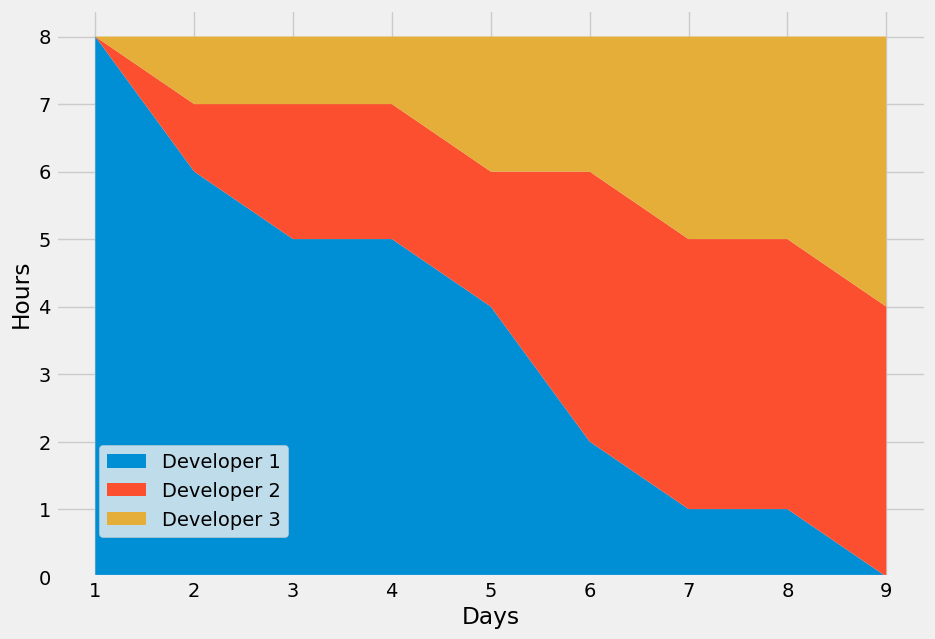

In [31]:
fig , ax = plt.subplots(
    figsize = (10,7)
)

labels = ['Developer 1','Developer 2','Developer 3']

ax.stackplot(
    days,
    dev1,
    dev2,
    dev3,
    labels = labels
);

ax.set(
    xlabel = 'Days',
    ylabel = 'Hours'
)
legend = ax.legend(
    loc=(0.05, 0.07),
    frameon=True
);



## Line plots with filling 

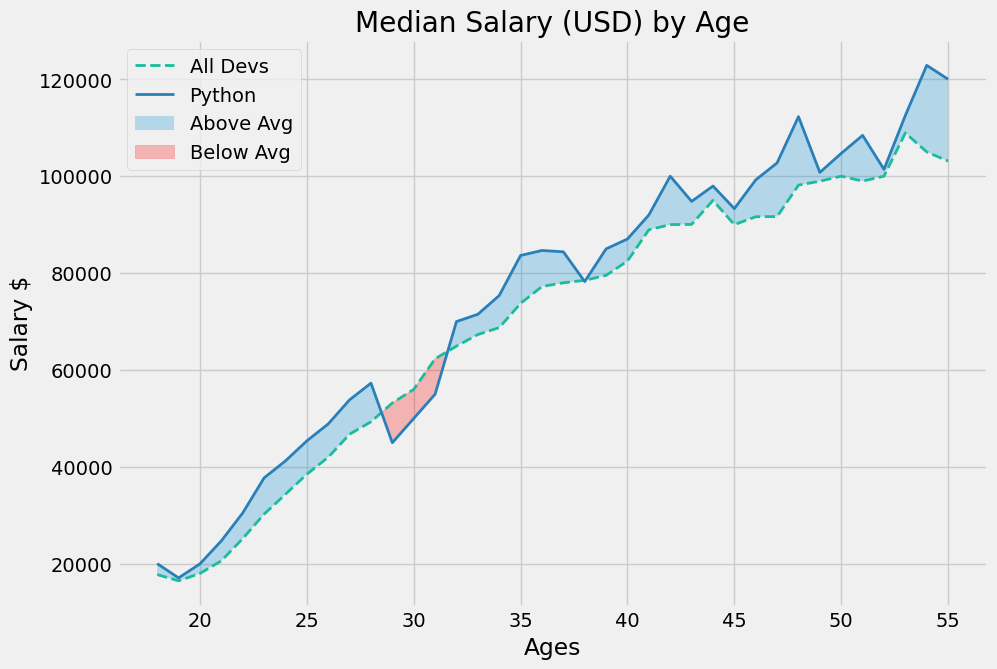

In [32]:
data = pd.read_csv('../data/programmers 2.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig , ax = plt.subplots(
    figsize = (10,7)
)

ax.plot(
    ages, 
    dev_salaries, 
    color='#1abc9c',
    linestyle='--',
    label='All Devs',
    linewidth = 2
)

ax.plot(
    ages,
    py_salaries,
    label='Python',
    linewidth = 2,
    color='#2980b9'
)

ax.set(
    title = 'Median Salary (USD) by Age',
    xlabel = 'Ages',
    ylabel = 'Salary $'
)

overall_median = 70000

ax.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, label='Above Avg')

ax.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

ax.legend();



## Histogram

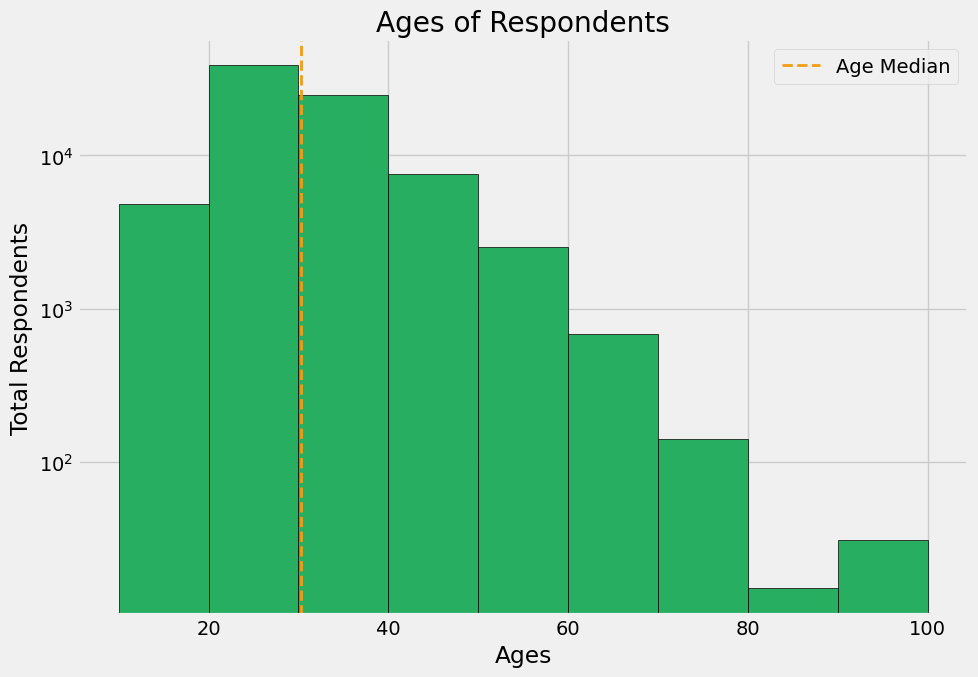

In [33]:
data = pd.read_csv('../data/hist data.csv')

ids = data['Responder_id']

ages = data['Age']

fig , ax = plt.subplots(
    figsize = (10,7)
)

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ax.hist(ages, bins=bins, edgecolor='black', log=True, color='#27ae60')

ax.axvline(np.mean(ages), color='#f39c12', label='Age Median', linewidth=2, linestyle='--')

ax.legend()

ax.set(
    title = 'Ages of Respondents',
    xlabel = 'Ages',
    ylabel = 'Total Respondents'
)

plt.tight_layout()

## Scatter


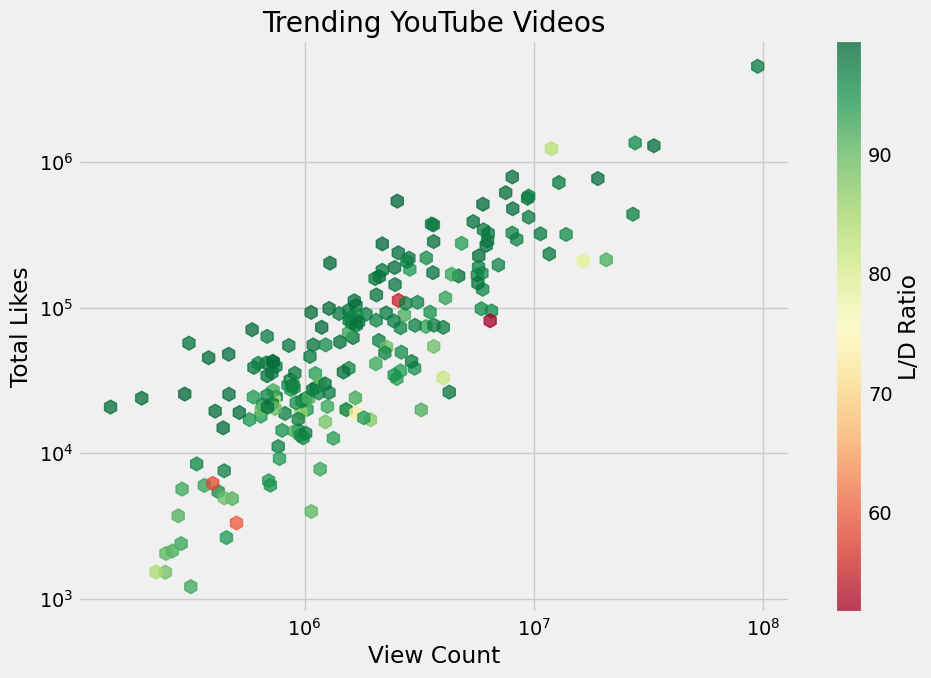

In [34]:
likes_data = pd.read_csv('../data/likes.csv');
likes_df = pd.DataFrame(likes_data)
likes_df

fig , ax = plt.subplots(
    figsize = (10,7)
)

scatter = ax.scatter(
    likes_df['view_count'],
    likes_df['likes'],
    c=likes_df['ratio'],
    s=100,
    marker = 'h',
    linewidth=1,
    alpha=0.75,
    cmap = 'RdYlGn',
)

cbar = plt.colorbar(scatter)
cbar.set_label('L/D Ratio')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set(
    title = 'Trending YouTube Videos',
    xlabel = 'View Count',
    ylabel = 'Total Likes'
);

plt.tight_layout()


## Time Series - Plot dates

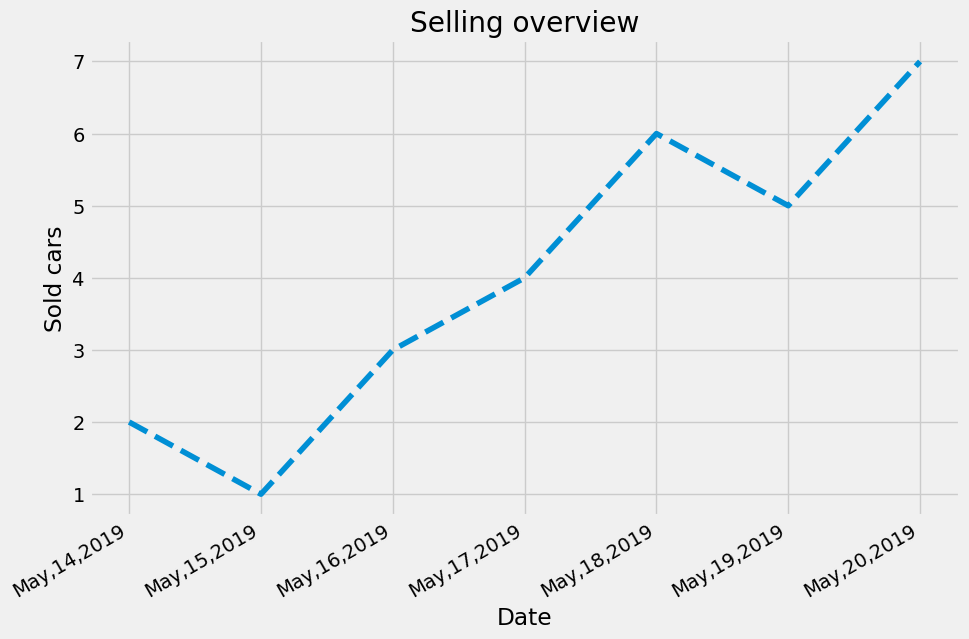

In [35]:
fig , ax = plt.subplots(
    figsize = (10,7)
)

dates = [
    pd.to_datetime('2019/05/14'),
    pd.to_datetime('2019/05/15'),
    pd.to_datetime('2019/05/16'),
    pd.to_datetime('2019/05/17'),
    pd.to_datetime('2019/05/18'),
    pd.to_datetime('2019/05/19'),
    pd.to_datetime('2019/05/20'),

]

pd.to_datetime('2019/05/14')
y = [2, 1, 3, 4, 6, 5, 7]

date_format = mdates.DateFormatter('%b,%d,%Y')


ax.plot(
    dates,
    y,
    linestyle='--',
)

fig.autofmt_xdate()

ax.set(
    title = 'Selling overview',
    xlabel = 'Date',
    ylabel = 'Sold cars',
);

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%d,%Y'))

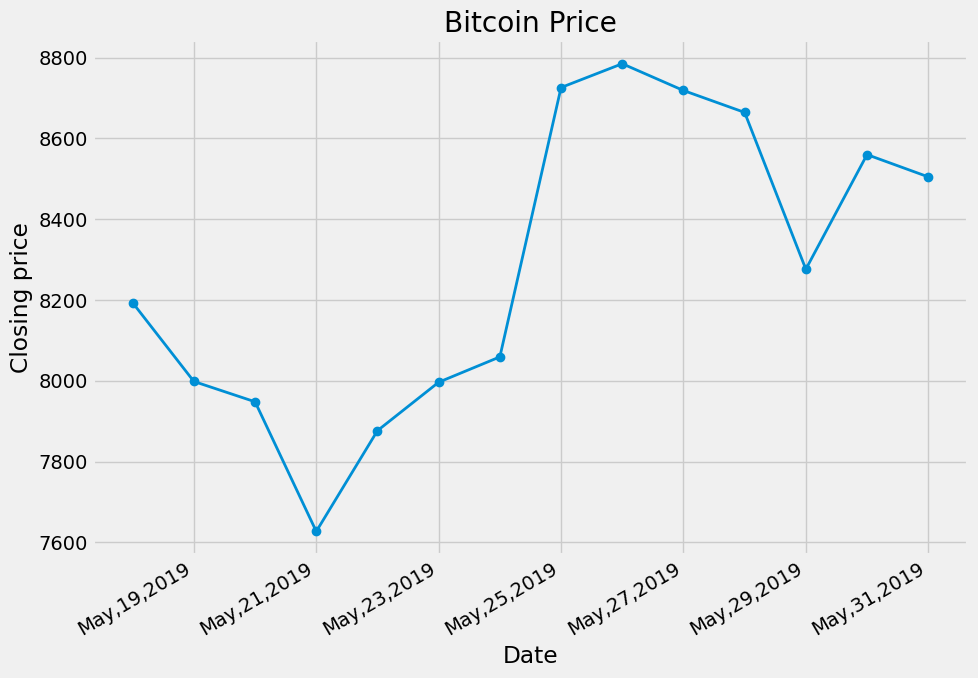

In [36]:
fig , ax = plt.subplots(
    figsize = (10,7)
)
# data = pd.read_csv('data.csv')
data = pd.read_csv('../data/time series.csv')
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

ax.plot(
    df['Date'],
    df['Close'],
    marker = 'o',
    linewidth=2
)

fig.autofmt_xdate()

ax.set(
    title = 'Bitcoin Price',
    xlabel = 'Date',
    ylabel = 'Closing price',
);

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%d,%Y'))

plt.tight_layout()